In [25]:
file = '/Users/hariharan/Desktop/coriander_powder.png'

from cv2_utils import resize_img, inflate_boxes, preprocess, read_img, resize_gray_img
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [13]:
def imshow(img, cmap = None):
    plt.figure(dpi = 250)
    plt.imshow(img, cmap = cmap)
    plt.axis('off')
    plt.show()

In [42]:
img= read_img(file)

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

array([[139,  86,  20, ..., 167, 166, 164],
       [134,  82,  32, ..., 167, 165, 163],
       [149,  78,  38, ..., 168, 168, 168],
       ...,
       [ 97,  98,  96, ..., 157, 158, 157],
       [ 98,  96,  97, ..., 159, 157, 155],
       [ 96,  99,  99, ..., 162, 159, 155]], dtype=uint8)

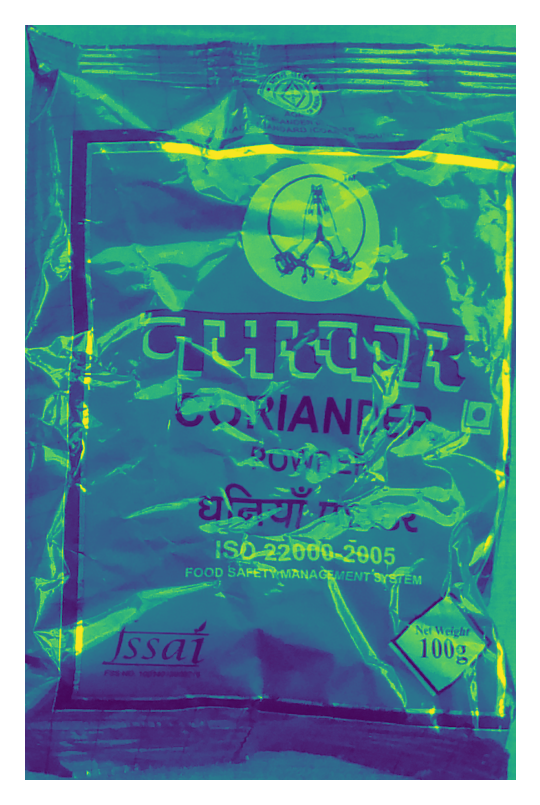

In [40]:
imshow(gray)

In [59]:
from skimage import measure
def create_mask(image):
    # gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    gray = image
    blurred = cv2.GaussianBlur( gray, (3,3), 0 )
    _,thresh_img = cv2.threshold( blurred, 180, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    labels = measure.label( thresh_img, connectivity=2, background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )
    return mask

In [60]:
mask = create_mask(equ)

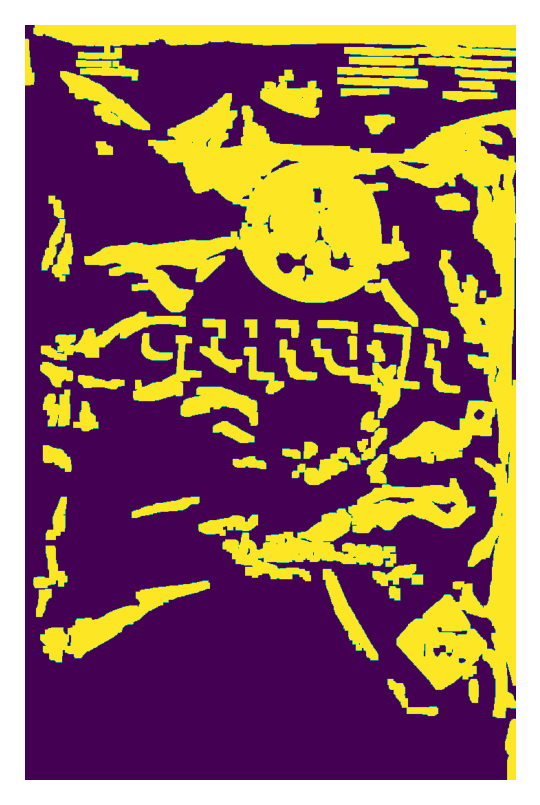

In [61]:
imshow(mask)

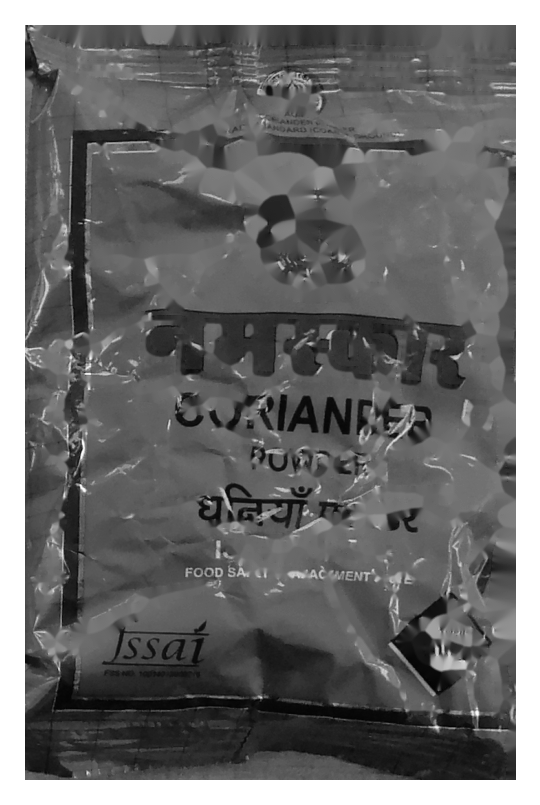

In [62]:
dst = cv2.inpaint(gray,mask,3,cv2.INPAINT_TELEA)
imshow(dst, cmap = 'gray')

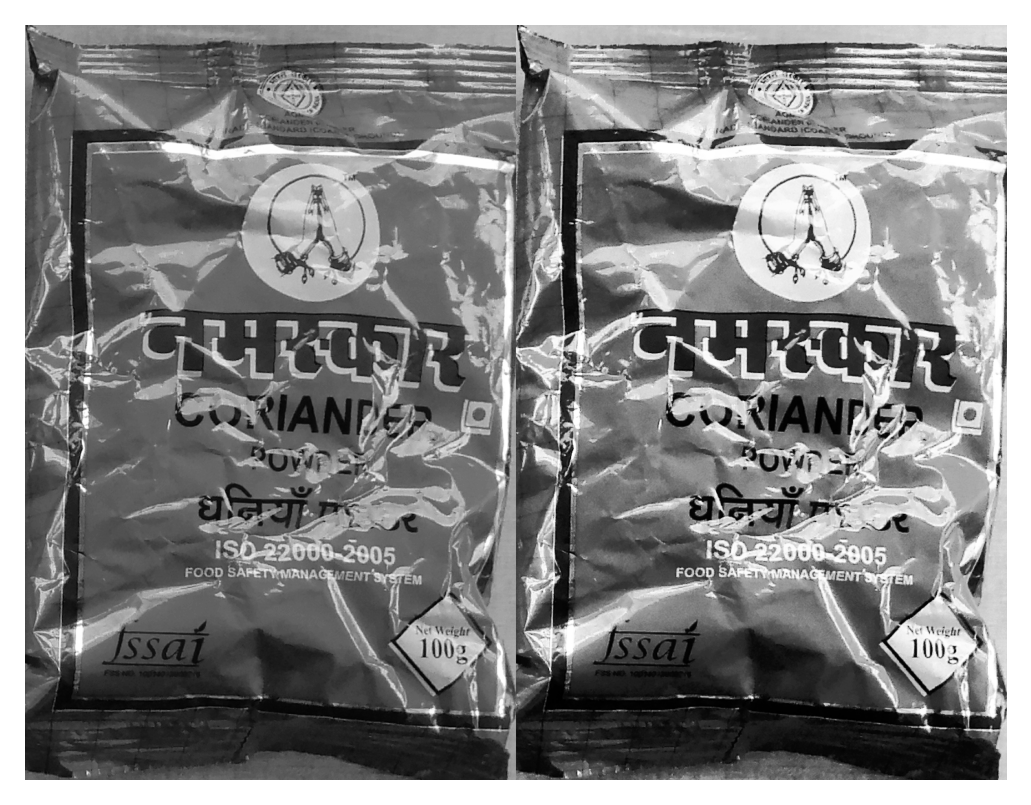

In [28]:
equ = cv2.equalizeHist(gray)
res = np.hstack((gray,equ))
imshow(res, cmap = 'gray')

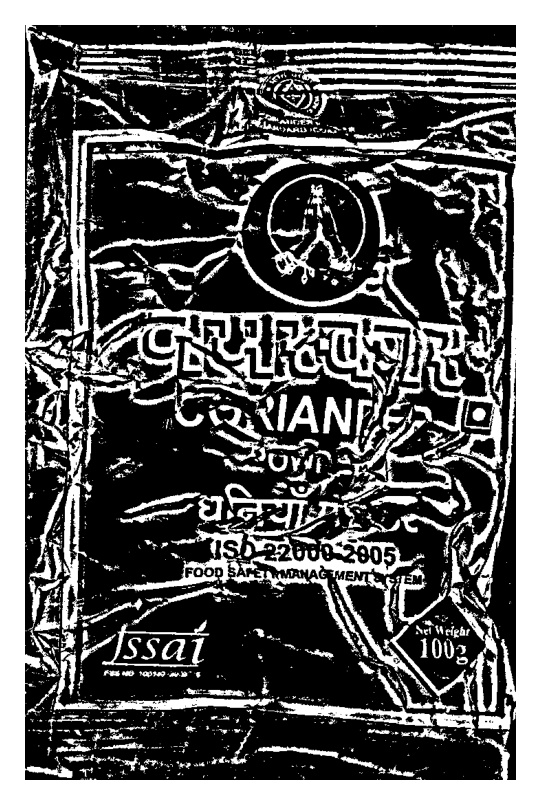

In [38]:
# Denoise 3rd frame considering all the 5 frames
dst = cv2.fastNlMeansDenoising(thresh, None, 10, 7,21)
imshow(dst, cmap = 'gray')

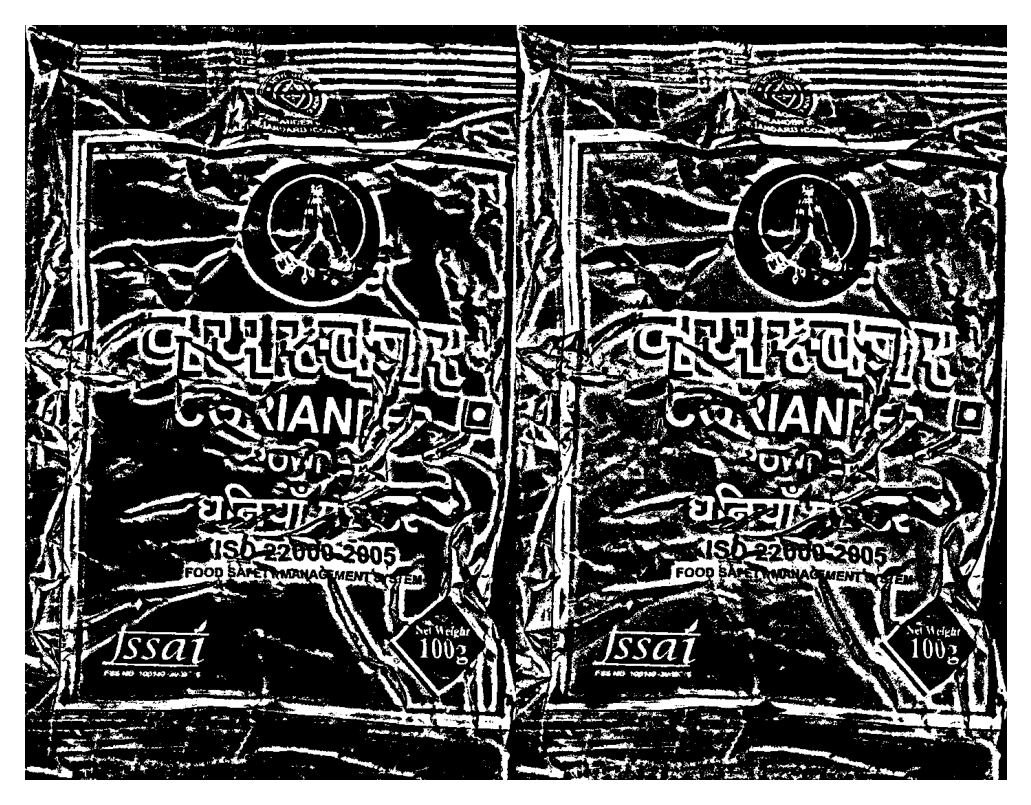

In [29]:
thresh = cv2.adaptiveThreshold(gray, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)
thresh_after_contrast = cv2.adaptiveThreshold(equ, 255,
                               cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 10)

res = np.hstack((thresh,thresh_after_contrast))
imshow(res, cmap = 'gray')

In [20]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_result = clahe.apply(gray)

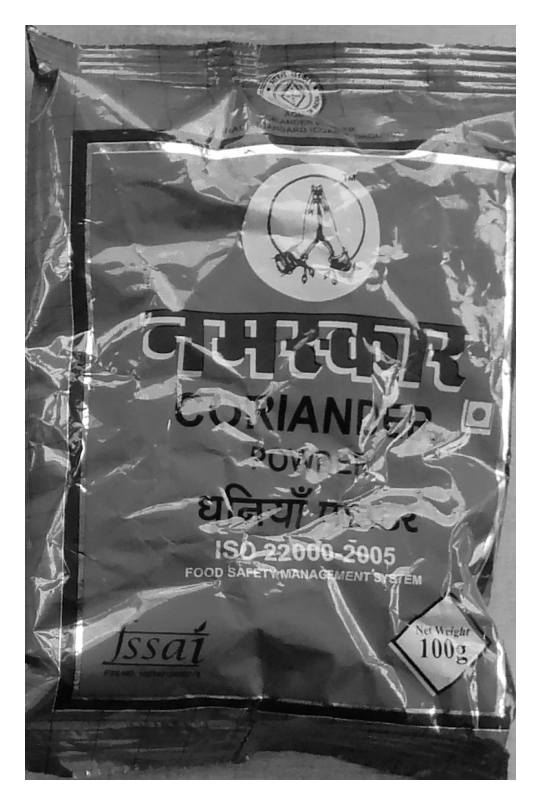

In [23]:
imshow(gray, cmap = 'gray')

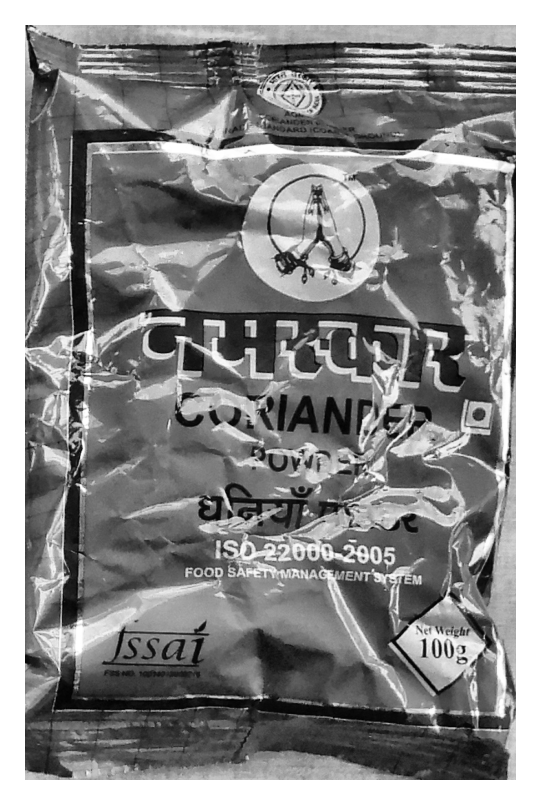

In [22]:
imshow(clahe_result, cmap = 'gray')